In [4]:
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import jieba
import numpy as np
from stylecloud import gen_stylecloud

source = open("mjh.txt","r", encoding='utf8')
lines = source.readlines()

### 词云

In [5]:
STOPWORDS = []
with open("stops.txt", "r") as f:
    for line in f.readlines():
        line = line.strip()
        STOPWORDS.append(line)

def wordcloud(comment_list):

    wordlist = jieba.lcut(' '.join(comment_list))
    text = ' '.join(wordlist)
    icon_name = "fas fa-space-shuttle"
    pic = str(icon_name) + '.png'
    gen_stylecloud(text=text,
                           size=1024,  # stylecloud 的大小（长度和宽度）
                           icon_name=icon_name,
                           font_path='simsun.ttc',
                           max_font_size=200,  # stylecloud 中的最大字号
                           max_words=2000,  # stylecloud 可包含的最大单词数
                           stopwords=True,  # 布尔值，用于筛除常见禁用词
                           custom_stopwords=STOPWORDS,
                           output_name=pic)
    return pic 
pic = wordcloud(lines)

In [6]:
from IPython.display import Image
Image(url= pic)

### 统计
情感各分数段出现频率

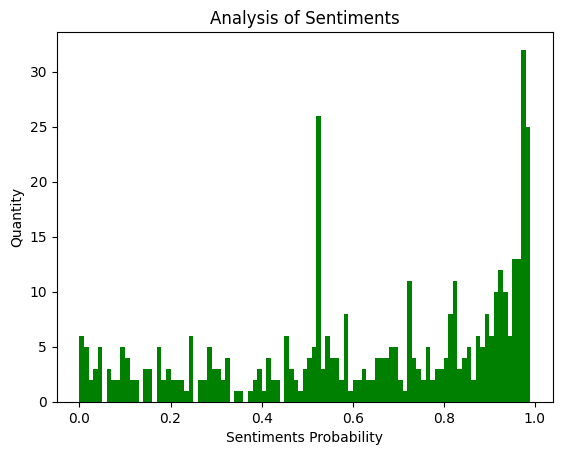

In [7]:
sentimentslist = []
for i in lines:
    s = SnowNLP(i)
    sentimentslist.append(s.sentiments)

plt.hist(sentimentslist, bins = np.arange(0, 1, 0.01), facecolor = 'g')
plt.xlabel('Sentiments Probability')
plt.ylabel('Quantity')
plt.title('Analysis of Sentiments')
plt.show()

情感波动分析

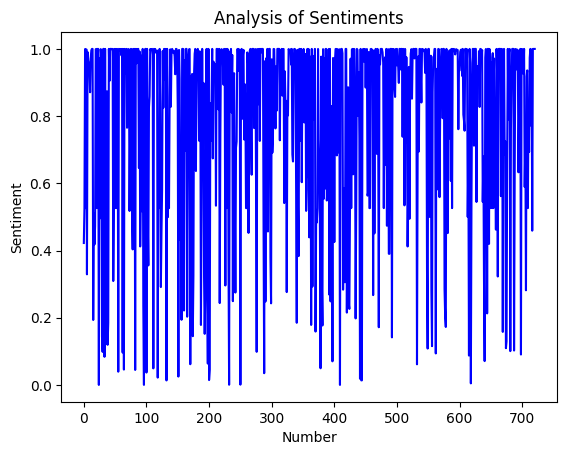

In [8]:
plt.plot(np.arange(0, len(sentimentslist), 1), sentimentslist, 'b-')
plt.xlabel('Number')
plt.ylabel('Sentiment')
plt.title('Analysis of Sentiments')
plt.show()